In [127]:
import pandas as pd
from support_functions import log_progress
import pickle
import numpy as np
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks")

In [163]:
# Load LOOCV results
loocv_result_df = pd.DataFrame.from_csv('results/loocv_results_min3_tree100_depth12_balanced.csv')
print('Number cpds tested: ', len(loocv_result_df.cpd.unique()))

# Count number of cells tested 
cells_subdf = loocv_result_df[['PC3','MCF7','HCC515','VCAP','HEPG2','A549','HA1E']]
loocv_result_df['n_cells'] = np.count_nonzero(cells_subdf, axis=1)

# Calculate percentiles
loocv_result_df['percentile'] = loocv_result_df['rank'] / loocv_result_df['n_potential_targets']

Number cpds tested:  182


In [164]:
# Refine results to best ranking for each cpd
loocv_top_result_df = pd.DataFrame(columns = loocv_result_df.columns)
for cpd in loocv_result_df.cpd.unique():
    cpd_results = loocv_result_df[loocv_result_df.cpd == cpd].sort_values('rank')
    top_result = cpd_results.iloc[0]
    loocv_top_result_df = loocv_top_result_df.append(top_result)

In [165]:
# Reorder columns
cols = ['cpd',
        'kd',
        'label',
        'proba',
        'rank',
        'n_potential_targets',
        'percentile',
        'n_cells',
        'PC3',
        'MCF7',
        'HCC515',
        'VCAP',
        'HEPG2',
        'A549',
        'HA1E',]
loocv_top_result_df = loocv_top_result_df[cols]

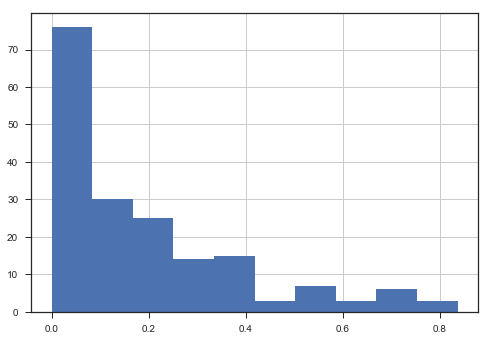

In [166]:
loocv_top_result_df.percentile.hist()
plt.show()

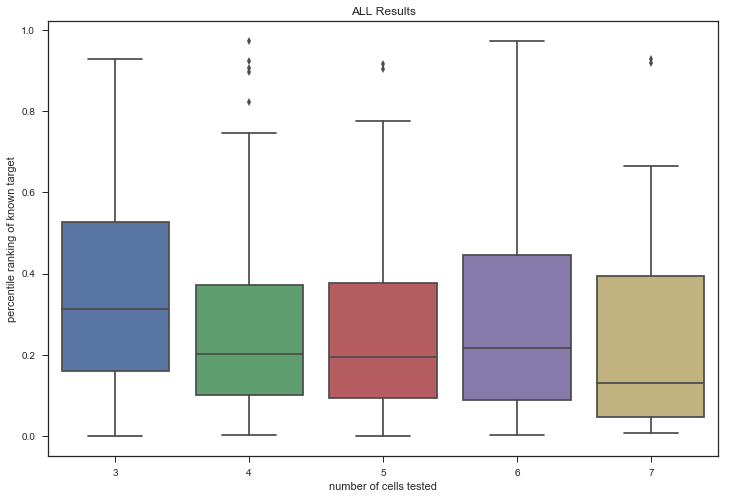

In [167]:
# Draw a boxplot to show rank by # cell lines tested
plt.figure(figsize=(12,8))
sns.boxplot(x=loocv_result_df.n_cells.values, 
            y=loocv_result_df.percentile.values,)
plt.title("ALL Results")
plt.xlabel("number of cells tested")
plt.ylabel("percentile ranking of known target")
plt.show()

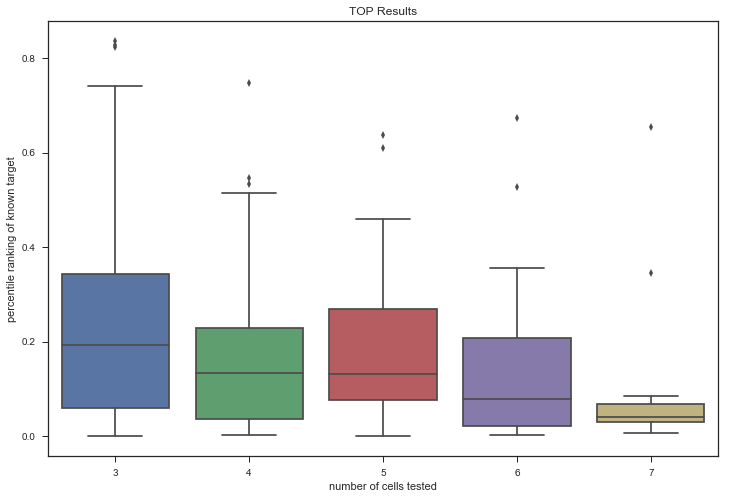

In [168]:
# Draw a boxplot to show rank by # cell lines tested
plt.figure(figsize=(12,8))
sns.boxplot(x=loocv_top_result_df.n_cells.values, 
            y=loocv_top_result_df.percentile.values,)
plt.title("TOP Results")
plt.xlabel("number of cells tested")
plt.ylabel("percentile ranking of known target")
plt.show()

In [169]:
pct_top_100 = np.count_nonzero(loocv_top_result_df['rank'] <= 100) / len(loocv_top_result_df)
pct_top_10_pct = np.count_nonzero(loocv_top_result_df['percentile'] <= 0.1) / len(loocv_top_result_df)
print('Percent Top-100:\t', pct_top_100)
print('Percent Top Quantile:\t', pct_top_10_pct)

Percent Top-100:	 0.2087912087912088
Percent Top Quantile:	 0.44505494505494503


In [202]:
# create a table to display top-100 accuracy as a function of cell line
cell_based_results = pd.DataFrame(columns=['n_cells','n_cpds','top_100','top_10_percent'])
for nc in loocv_top_result_df.n_cells.unique():
    cpds = loocv_top_result_df[loocv_top_result_df.n_cells == nc]
    pct_top_100 = np.count_nonzero(cpds['rank'] <= 100) / len(cpds)
    pct_top_10_pct = np.count_nonzero(cpds['percentile'] <= 0.1) / len(cpds)
    row = {'n_cells': nc, 'n_cpds': len(cpds), 'top_100': pct_top_100, 'top_10_percent': pct_top_10_pct}
    cell_based_results = cell_based_results.append(row, ignore_index=True)
cell_based_results.sort_values('n_cells')

,n_cells,n_cpds,top_100,top_10_percent
0,3.00,58.00,0.21,0.34
1,4.00,41.00,0.20,0.37
4,5.00,38.00,0.13,0.37
2,6.00,30.00,0.30,0.63
3,7.00,15.00,0.27,0.87


In [178]:
class Mean():
    
    def __init__(self, mean, stdev):
        self.mean = mean
        self.stdev = stdev
        
    def __str__(self):
        return '{:.2f}'.format(self.mean) + ' +/- ' + '{:.2f}'.format(self.stdev)
    
    def __repr__(self):
        return self.__str__()

4.56 +/- 1.34